# Python 散点绘图的平滑方法：差值与拟合

> 创建时间：2019-10-21

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sklearn.kernel_ridge import KernelRidge

我们现在对以 $y = \sin(x) + 0.2 \mathscr{N}(0, 1)$ 的有噪声图 (`y` 对 `x`) 作平滑绘图。噪声点使用蓝色粗点表示，$y = \sin(x)$ 曲线 (`y_0` 对 `x_0`) 用蓝色虚线表示。

In [2]:
np.random.seed(0)

x = np.arange(- np.pi, np.pi, np.pi / 8)
y = np.sin(x) + np.random.randn(x.size) / 5

x_0 = np.arange(- np.pi, np.pi, np.pi / 100)
y_0 = np.sin(x_0)

一种平滑方式是差值。这种方式最好使用在数据点不太密集的情况下。差值的曲线 (`y_1` 对 `x_0`) 用绿色线表示。

In [3]:
spl = make_interp_spline(x, y, k=3)
y_1 = spl(x_0)

另一种平滑方式是使用 RBF Kernel 作 KRR，这种方式可以在数据点较密时使用，但需要手动调整超参数 `alpha`。`alpha` 相当于拟合过程中的惩罚项，过大会使曲线区域平线，过小会过拟合。拟合的曲线 (`y_2` 对 `x_0`) 用橙色线表示。

In [4]:
clf = KernelRidge(alpha=0.1, kernel="rbf")
clf.fit(x.reshape(-1, 1), y)
y_2 = clf.predict(x_0.reshape(-1, 1))

我们绘制图像以看效果：

<IPython.core.display.Javascript object>


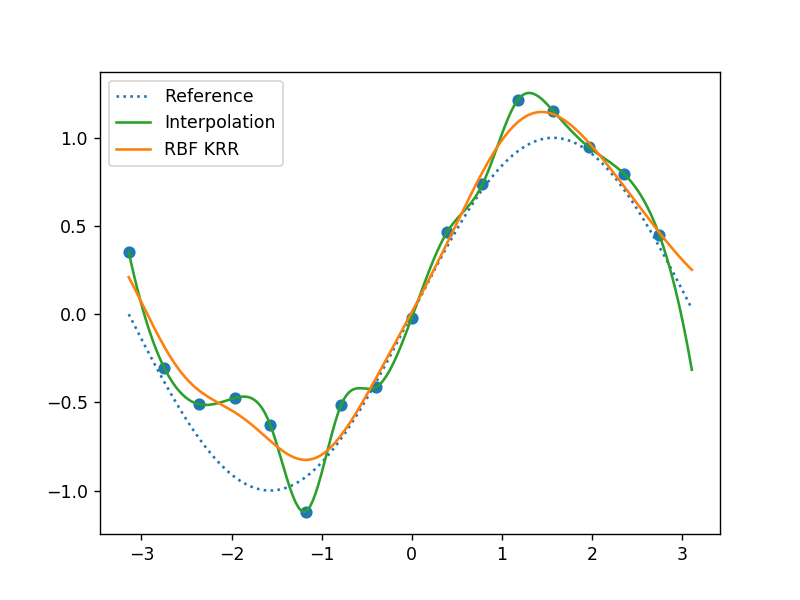

In [5]:
fig, ax = plt.subplots()

ax.scatter(x, y)

ax.plot(x_0, y_0, linestyle=":", label="Reference")
ax.plot(x_0, y_1, label="Interpolation", color="C2")
ax.plot(x_0, y_2, label="RBF KRR", color="C1")
ax.legend()